In [1]:
!git clone https://github.com/HoanChan/TableVision.git

Cloning into 'TableVision'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 127 (delta 10), reused 40 (delta 5), pack-reused 81
Receiving objects: 100% (127/127), 207.94 MiB | 23.22 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Updating files: 100% (24/24), done.


In [2]:
!git clone https://github.com/microsoft/table-transformer

Cloning into 'table-transformer'...
remote: Enumerating objects: 753, done.
remote: Counting objects: 100% (436/436), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 753 (delta 338), reused 381 (delta 303), pack-reused 317
Receiving objects: 100% (753/753), 358.67 KiB | 1.37 MiB/s, done.
Resolving deltas: 100% (465/465), done.


In [3]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 11.9 MB/s eta 0:00:00


In [4]:
def split_pth_file(input_file, output_file1, output_file2):
    with open(input_file, 'rb') as f:
        data = f.read()

    half_len = len(data) // 2

    with open(output_file1, 'wb') as f1, open(output_file2, 'wb') as f2:
        f1.write(data[:half_len])
        f2.write(data[half_len:])

def combine_pth_files(input_file1, input_file2, output_file):
    with open(input_file1, 'rb') as f1, open(input_file2, 'rb') as f2:
        data1 = f1.read()
        data2 = f2.read()

    combined_data = data1 + data2

    with open(output_file, 'wb') as f:
        f.write(combined_data)

In [5]:
combine_pth_files("/content/TableVision/models/pubtables1m_detection_detr_r18.pth_part1", "/content/TableVision/models/pubtables1m_detection_detr_r18.pth_part2", "/content/TableVision/models/pubtables1m_detection_detr_r18.pth")
combine_pth_files("/content/TableVision/models/pubtables1m_structure_detr_r18.pth_part1", "/content/TableVision/models/pubtables1m_structure_detr_r18.pth_part2", "/content/TableVision/models/pubtables1m_structure_detr_r18.pth")


In [10]:
import sys
# Thêm đường dẫn đến thư mục 'src' vào danh sách đường dẫn
sys.path.append('/content/TableVision/')
sys.path.append('/content/table-transformer/')
sys.path.append('/content/table-transformer/src/')
sys.path.append('/content/table-transformer/detr/')

from src.inference import TableExtractionPipeline

# Create inference pipeline
pipe = TableExtractionPipeline(det_config_path='/content/table-transformer/src/detection_config.json',
                               det_model_path='/content/TableVision/models/pubtables1m_detection_detr_r18.pth', det_device='cuda',
                               str_config_path='/content/table-transformer/src/structure_config.json',
                               str_model_path='/content/TableVision/models/pubtables1m_structure_detr_r18.pth', str_device='cuda')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Detection model initialized.
Detection model weights loaded.
Structure model initialized.
Structure model weights loaded.


In [12]:
import matplotlib.pyplot as plt
from PIL import Image
from src.inference import visualize_detected_tables, visualize_cells

def detectTable(pipe, img_path):
  img = Image.open(img_path)
  tokens = {}
  extracted_tables = pipe.recognize(img, tokens, out_objects=True, out_cells=True, out_html=True, out_csv=True)

  # Select table (there could be more than one)
  try:
    extracted_table = extracted_tables[0]
  except:
    extracted_table = extracted_tables

  # Get output in desired format
  objects = extracted_table['objects']
  cells = extracted_table['cells']
  csv = extracted_table['csv']
  html = extracted_table['html']

  visualize_detected_tables(img, objects, "/content/1.jpg")
  visualize_cells(img, cells[0], "/content/2.jpg")

  img0 = Image.open(img_path)
  img1 = Image.open('/content/1.jpg')
  img2 = Image.open('/content/2.jpg')

  plt.figure(figsize=(15, 5))

  plt.subplot(131)
  plt.imshow(img0)
  plt.title('Image 0')
  plt.axis('off')

  plt.subplot(132)
  plt.imshow(img1)
  plt.title('Image 1')
  plt.axis('off')


  plt.subplot(133)
  plt.imshow(img2)
  plt.title('Image 2')
  plt.axis('off')

  plt.show()


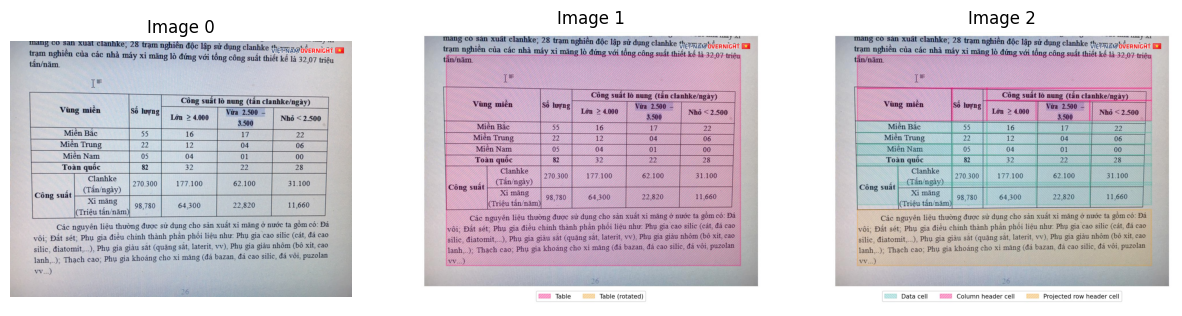

In [13]:
detectTable(pipe, "/content/TableVision/sample/vn0.jpg")

In [9]:
!git clone https://github.com/HoanChan/TNCR

Cloning into 'TNCR'...
remote: Enumerating objects: 13229, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13229 (delta 1), reused 3 (delta 0), pack-reused 13223
Receiving objects: 100% (13229/13229), 1.79 GiB | 32.53 MiB/s, done.
Resolving deltas: 100% (6240/6240), done.
Updating files: 100% (13243/13243), done.


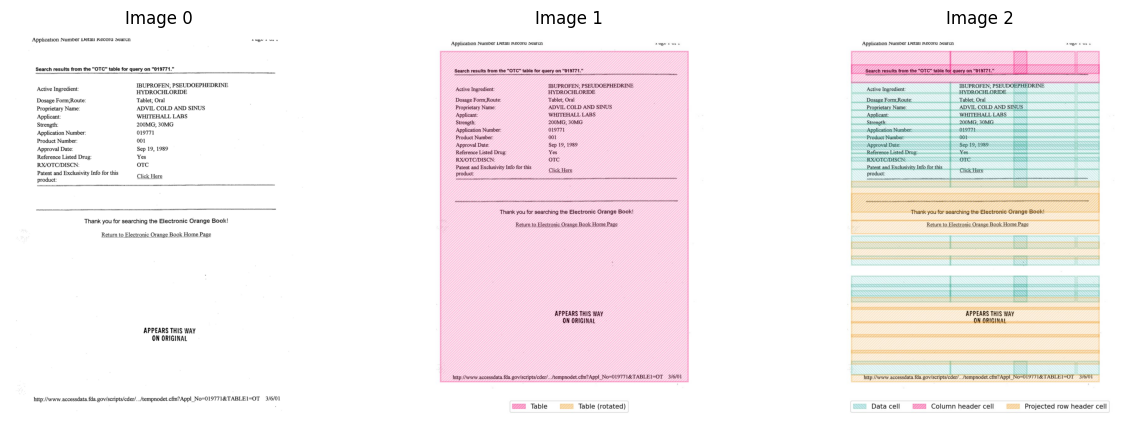

In [15]:
detectTable(pipe, "/content/TNCR/TNCR/0005ab896e95c5de6885bbf595500a8e-138.png")

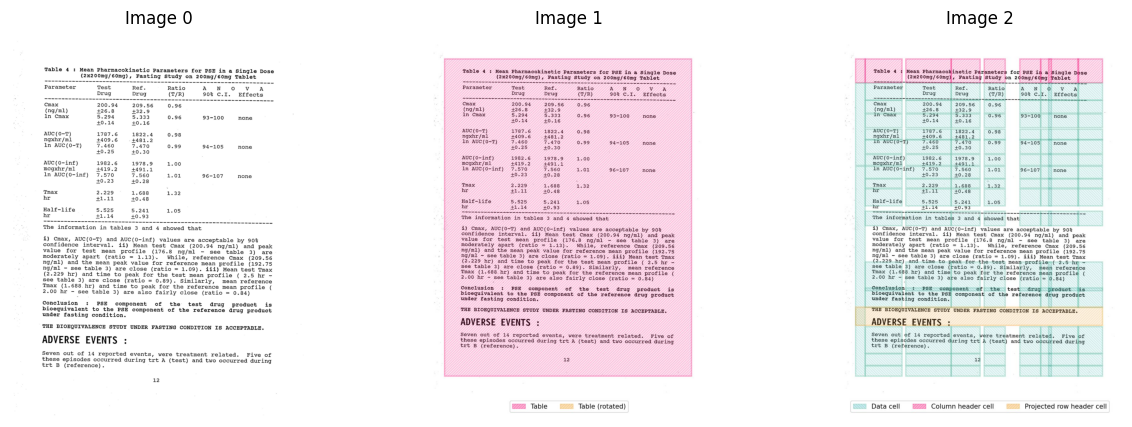

In [16]:
detectTable(pipe, "/content/TNCR/TNCR/0005ab896e95c5de6885bbf595500a8e-58.png")

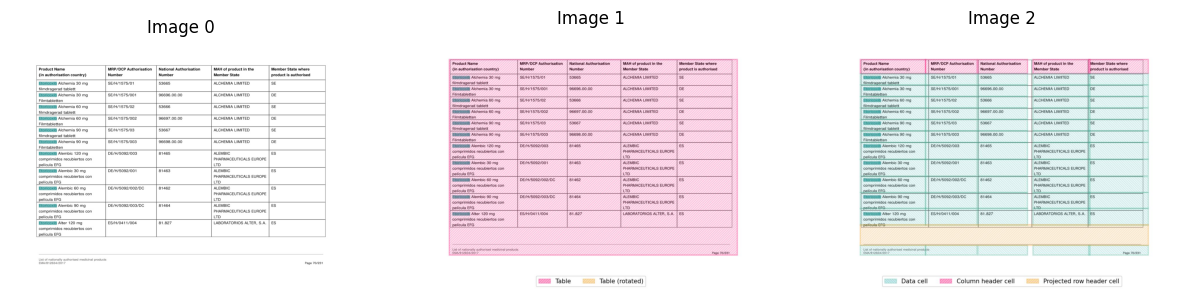

In [17]:
detectTable(pipe, "/content/TNCR/TNCR/000c6147336fa20c69f9ea582364ce2e.jpg")